In [43]:
# using Relu, Sigmoid, Tanh operaions (functions)
from caffe2.python import workspace,core

import numpy as np
import matplotlib.pyplot as plt
from random import randint

# net visualization
from caffe2.python import net_drawer
from IPython import display

In [44]:
input_relu_blob = 2.5 * np.random.rand(3,2).astype(np.float32) + 3

In [45]:
print(input_relu_blob)

[[3.0658863 4.937279 ]
 [3.2576084 4.8501797]
 [5.2500706 3.3087196]]


In [46]:
input_relu_blob[1][1] = -3 * input_relu_blob[2][0]
input_relu_blob[2][0] = -1 * input_relu_blob[0][0]
input_relu_blob[2][1] = -2 * input_relu_blob[1][0]

In [47]:
input_relu_blob

array([[  3.0658863,   4.937279 ],
       [  3.2576084, -15.750212 ],
       [ -3.0658863,  -6.515217 ]], dtype=float32)

In [48]:
# add the input to the workspace
workspace.FeedBlob('input_relu_blob',input_relu_blob)

True

In [49]:
# Relu === MAX(0, x)
relu_op = core.CreateOperator(
 "Relu",
['input_relu_blob'],
['output_relu_blob'])

In [50]:
print(relu_op)

input: "input_relu_blob"
output: "output_relu_blob"
name: ""
type: "Relu"



In [51]:
# run the operator
workspace.RunOperatorOnce(relu_op)

True

In [52]:
# check the blobls. we now have output_blob which Relu function has applied upon
workspace.Blobs()

['W', 'X', 'Y', 'b', 'input_relu_blob', 'output_relu_blob']

In [53]:
# here is the outout for the relu activation function
workspace.FetchBlob('output_relu_blob')

array([[3.0658863, 4.937279 ],
       [3.2576084, 0.       ],
       [0.       , 0.       ]], dtype=float32)

In [54]:
# sigmoid activation
sigmoid_op = core.CreateOperator(
 "Sigmoid",
['input_sigmoid_blob'],
['output_sigmoid_blob'])

In [55]:
# generates some input to feed into the sigmoid operator
input_sigmoid_blob = 4.5 * np.random.rand(3,2).astype(np.float32) + 3

In [56]:
# add the input to the workspace
workspace.FeedBlob('input_sigmoid_blob', input_sigmoid_blob)

True

In [57]:
input_sigmoid_blob

array([[4.937201 , 4.020255 ],
       [3.6757298, 6.926701 ],
       [6.4458632, 6.516525 ]], dtype=float32)

In [58]:
# run the sigmoid operator
workspace.RunOperatorOnce(sigmoid_op)

True

In [59]:
# applies the sigmoid (logistic regression) to the input
workspace.FetchBlob('output_sigmoid_blob')

array([[0.99287647, 0.98236805],
       [0.9752949 , 0.99901974],
       [0.99841547, 0.9985234 ]], dtype=float32)

In [60]:
# tanh activation - in-place operation (input and output are the same!)
tanh_op = core.CreateOperator(
 "Tanh",
['input_tanh_blob'],
['input_tanh_blob'])

In [61]:
# generates some input to feed into the tanh operator
input_tanh_blob = 1.5 * np.random.rand(2,2).astype(np.float32) + 3

In [62]:
input_tanh_blob

array([[3.249302 , 4.4776244],
       [3.7507055, 4.288149 ]], dtype=float32)

In [63]:
workspace.FeedBlob('input_tanh_blob', input_tanh_blob)

True

In [64]:
workspace.RunOperatorOnce(tanh_op)

True

In [65]:
workspace.FetchBlob('input_tanh_blob')

array([[0.9969934, 0.9997419],
       [0.998896 , 0.999623 ]], dtype=float32)

In [66]:
# check the blobls...
workspace.Blobs()

['W',
 'X',
 'Y',
 'b',
 'input_relu_blob',
 'input_sigmoid_blob',
 'input_tanh_blob',
 'output_relu_blob',
 'output_sigmoid_blob']

In [67]:
workspace.ResetWorkspace()

True

In [68]:
# it is empty now and ready for the neural network which i am going to create in the rest of the notebook!
workspace.Blobs()

[]

In [69]:
net = core.Net('neural_network')

In [70]:
# protol buffer representation
print(' current network proto: \n', net.Proto())

 current network proto: 
 name: "neural_network_1"



In [71]:
# create and initialize a blob using net and GaussianFill
W = net.GaussianFill([],['W'], mean=0.0, std=0.8, shape=[7,2], run_once=0)

In [72]:
W

BlobReference("W")

In [73]:
str(W)

'W'

In [74]:
# here has the reference to our neural network
W.Net()

In [75]:
W.Net().Proto()

name: "neural_network_1"
op {
  output: "W"
  name: ""
  type: "GaussianFill"
  arg {
    name: "mean"
    f: 0.0
  }
  arg {
    name: "std"
    f: 0.800000011920929
  }
  arg {
    name: "shape"
    ints: 7
    ints: 2
  }
  arg {
    name: "run_once"
    i: 0
  }
}

In [76]:
X = net.GaussianFill([],['X'], mean=0.0, std=1.0, shape=[5,2], run_once=0)

In [77]:
X

BlobReference("X")

In [78]:
b = net.ConstantFill([],['b'], value=1, shape=[7,], run_once=0)
b

BlobReference("b")

In [79]:
# FC = fully-connected dense layer without activation
Y = net.FC([X, W , b], ['Y'] )

In [80]:
Y

BlobReference("Y")

In [81]:
print('current network proto:\n\n', net.Proto())

current network proto:

 name: "neural_network_1"
op {
  output: "W"
  name: ""
  type: "GaussianFill"
  arg {
    name: "mean"
    f: 0.0
  }
  arg {
    name: "std"
    f: 0.800000011920929
  }
  arg {
    name: "shape"
    ints: 7
    ints: 2
  }
  arg {
    name: "run_once"
    i: 0
  }
}
op {
  output: "X"
  name: ""
  type: "GaussianFill"
  arg {
    name: "mean"
    f: 0.0
  }
  arg {
    name: "std"
    f: 1.0
  }
  arg {
    name: "shape"
    ints: 5
    ints: 2
  }
  arg {
    name: "run_once"
    i: 0
  }
}
op {
  output: "b"
  name: ""
  type: "ConstantFill"
  arg {
    name: "value"
    i: 1
  }
  arg {
    name: "shape"
    ints: 7
  }
  arg {
    name: "run_once"
    i: 0
  }
}
op {
  input: "X"
  input: "W"
  input: "b"
  output: "Y"
  name: ""
  type: "FC"
}



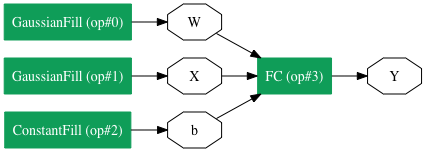

In [82]:
# LR = network layout: Left to Right
graph = net_drawer.GetPydotGraph(net, rankdir="LR")
display.Image(graph.create_png(), width=800)

In [83]:
print('Nothing is being executed yet. so, the workspace is still empty:?', workspace.Blobs())

Nothing is being executed yet. so, the workspace is still empty:? []


In [84]:
workspace.RunNetOnce(net)

RuntimeError: [enforce fail at tensor.h:504] IsType<T>(). Tensor type mismatch, caller expects elements to be float while tensor contains long long Error from operator: 
input: "X" input: "W" input: "b" output: "Y" name: "" type: "FC"
** while accessing input: b

In [85]:
workspace.Blobs()

['W', 'X', 'Y', 'b']

In [86]:
workspace.FetchBlob('b')

array([1, 1, 1, 1, 1, 1, 1], dtype=int64)